In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Acquisition

In [2]:
xls = pd.ExcelFile('Spreadsheets_Exercises.xlsx')
xls

In [3]:
xls.sheet_names

['Table1_CustDetails',
 'Table2_ContractType',
 'Table3_PhoneService',
 'Table4_InternetService',
 'Table5_Dates',
 'Table6_Holidays',
 'Table7_Users',
 'Table8_Sparklines']

# Preparation 
## 1. Handling null values: the Nan values in total_charges are filled with the montly_charges in the same row, assuming the customer just started the service for the 1st month

In [4]:
# Null values have been found in column 'total_charges'

CustDetails = xls.parse('Table1_CustDetails')
CustDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 661.0+ KB


In [5]:
is_nan = CustDetails.isnull()
is_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   customer_id        7049 non-null   bool 
 1   gender             7049 non-null   bool 
 2   is_senior_citizen  7049 non-null   bool 
 3   partner            7049 non-null   bool 
 4   dependents         7049 non-null   bool 
 5   phone_service      7049 non-null   bool 
 6   internet_service   7049 non-null   bool 
 7   contract_type      7049 non-null   bool 
 8   payment_type       7049 non-null   bool 
 9   monthly_charges    7049 non-null   bool 
 10  total_charges      7049 non-null   bool 
 11  churn              7049 non-null   bool 
dtypes: bool(12)
memory usage: 82.7 KB


In [6]:
row_has_nan = is_nan.any(axis=1)
row_has_nan.describe()

count      7049
unique        2
top       False
freq       7038
dtype: object

In [7]:
row_with_nan = CustDetails[row_has_nan].sort_values(by = 'monthly_charges')
row_with_nan

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
2025,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,19.70,NaN,No
5433,7644-OMVMY,Male,0,Yes,Yes,1,0,2,Mailed check,19.85,NaN,No
1731,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,20.00,NaN,No
2176,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,20.25,NaN,No
2250,3213-VVOLG,Male,0,Yes,Yes,2,0,2,Mailed check,25.35,NaN,No
3052,4367-NUYAO,Male,0,Yes,Yes,2,0,2,Mailed check,25.75,NaN,No
3118,4472-LVYGI,Female,0,Yes,Yes,0,1,2,Bank transfer (automatic),52.55,NaN,No
945,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),56.05,NaN,No
1906,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),61.90,NaN,No
2855,4075-WKNIU,Female,0,Yes,Yes,2,1,2,Mailed check,73.35,NaN,No


In [8]:
filled_values = CustDetails.monthly_charges.iloc[row_with_nan.index]
filled_values

2025    19.70
5433    19.85
1731    20.00
2176    20.25
2250    25.35
3052    25.75
3118    52.55
945     56.05
1906    61.90
2855    73.35
4054    80.85
Name: monthly_charges, dtype: float64

In [9]:
CustDetails.total_charges.iloc[row_with_nan.index] = filled_values
CustDetails.iloc[row_with_nan.index]

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
2025,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,19.70,19.70,No
5433,7644-OMVMY,Male,0,Yes,Yes,1,0,2,Mailed check,19.85,19.85,No
1731,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,20.00,20.00,No
2176,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,20.25,20.25,No
2250,3213-VVOLG,Male,0,Yes,Yes,2,0,2,Mailed check,25.35,25.35,No
3052,4367-NUYAO,Male,0,Yes,Yes,2,0,2,Mailed check,25.75,25.75,No
3118,4472-LVYGI,Female,0,Yes,Yes,0,1,2,Bank transfer (automatic),52.55,52.55,No
945,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),56.05,56.05,No
1906,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),61.90,61.90,No
2855,4075-WKNIU,Female,0,Yes,Yes,2,1,2,Mailed check,73.35,73.35,No


In [10]:
CustDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7049 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 661.0+ KB


# Preparation 
## 2. Remove duplicates

In [11]:
is_duplicated = CustDetails.duplicated()
is_duplicated

0       False
1       False
2       False
3       False
4       False
        ...  
7044    False
7045    False
7046    False
7047    False
7048    False
Length: 7049, dtype: bool

In [12]:
duplicated_rows = CustDetails[is_duplicated]
duplicated_rows

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
7031,0032-PGELS,Female,0,Yes,Yes,0,1,0,Bank transfer (automatic),30.5,30.50,Yes
7032,0036-IHMOT,Female,0,Yes,Yes,1,2,1,Bank transfer (automatic),103.7,5656.75,No
7033,0040-HALCW,Male,0,Yes,Yes,1,0,2,Credit card (automatic),20.4,1090.60,No
7034,0042-JVWOJ,Male,0,No,No,1,0,1,Bank transfer (automatic),19.6,471.85,No
7035,0042-RLHYP,Female,0,Yes,Yes,1,0,2,Bank transfer (automatic),19.7,1396.90,No
7036,0048-LUMLS,Male,0,Yes,Yes,1,2,1,Credit card (automatic),91.2,3247.55,No


In [13]:
CustDetails.drop_duplicates(inplace=True)
CustDetails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   is_senior_citizen  7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   phone_service      7043 non-null   int64  
 6   internet_service   7043 non-null   int64  
 7   contract_type      7043 non-null   int64  
 8   payment_type       7043 non-null   object 
 9   monthly_charges    7043 non-null   float64
 10  total_charges      7043 non-null   float64
 11  churn              7043 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 715.3+ KB


In [14]:
CustDetails.sample(5)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
2723,3873-WOSBC,Male,0,Yes,No,2,0,2,Credit card (automatic),25.60,1784.90,No
5209,7326-RIGQZ,Male,0,Yes,Yes,1,2,0,Electronic check,69.80,377.85,No
2700,3841-NFECX,Female,1,Yes,No,2,2,2,Credit card (automatic),96.35,6766.95,No
6301,8914-RBTSB,Male,0,Yes,No,2,2,0,Electronic check,93.80,3019.50,Yes
5485,7721-DVEKZ,Female,0,No,No,1,0,0,Mailed check,19.65,19.65,No


# Preparation
## 3. Changing data type
### a. How to handle categorical variables represented by number?
### b. How to handle binary varibales? 

In [15]:
CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


In [16]:
CustDetails.is_senior_citizen = CustDetails.is_senior_citizen.map({0:'No', 1:'Yes'})

CustDetails.phone_service = CustDetails.phone_service.map({0:'No Phone Service', 
                                                           1:'One Line', 
                                                           2:'Two or More Lines'})
CustDetails.internet_service = CustDetails.internet_service.map({0:'No Internet Service', 
                                                                 1:'DSL', 
                                                                 2:'Fiber Optic'})
CustDetails.contract_type = CustDetails.contract_type.map({0:'Month-to-Month', 
                                                           1:'1 Year', 
                                                           2:'2 Year'})
CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,No,Yes,Yes,One Line,DSL,1 Year,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,No,No,No,Two or More Lines,DSL,Month-to-Month,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,No,No,No,One Line,Fiber Optic,Month-to-Month,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,Yes,Yes,No,One Line,Fiber Optic,Month-to-Month,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,Yes,Yes,No,One Line,Fiber Optic,Month-to-Month,Mailed check,83.9,267.40,Yes


# Preparation
## 4. Calculate the montly tenure

In [17]:
CustDetails['monthly_tenure'] = round(CustDetails.total_charges / CustDetails.monthly_charges)

CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure
0,0002-ORFBO,Female,No,Yes,Yes,One Line,DSL,1 Year,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,No,No,No,Two or More Lines,DSL,Month-to-Month,Mailed check,59.9,542.40,No,9.0
2,0004-TLHLJ,Male,No,No,No,One Line,Fiber Optic,Month-to-Month,Electronic check,73.9,280.85,Yes,4.0
3,0011-IGKFF,Male,Yes,Yes,No,One Line,Fiber Optic,Month-to-Month,Electronic check,98.0,1237.85,Yes,13.0
4,0013-EXCHZ,Female,Yes,Yes,No,One Line,Fiber Optic,Month-to-Month,Mailed check,83.9,267.40,Yes,3.0


# Preparation

## 5. Find out service type

In [18]:
print(CustDetails.phone_service.unique())
print(CustDetails.internet_service.unique())

['One Line' 'Two or More Lines' 'No Phone Service']
['DSL' 'Fiber Optic' 'No Internet Service']


In [19]:
# Is there any customer who don't have neither of the service? 

no_service = (CustDetails.phone_service == 'No Phone Service') & (CustDetails.internet_service == 'No Internet Service')
no_service
CustDetails[no_service]

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure


In [20]:
def service_type(row):
    if row['phone_service'] == 'No Phone Service':
        return "Internet only"
    elif row['internet_service'] == 'No Internet Service':
        return "Phone only"
    else:
        return "Phone & Internet"
    
service_type(CustDetails.iloc[5])

'Phone & Internet'

In [21]:
CustDetails['service_type'] = CustDetails.apply(service_type, axis=1)

In [22]:
CustDetails.sample(5)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure,service_type
6755,9588-YRFHY,Male,No,No,No,One Line,No Internet Service,2 Year,Credit card (automatic),19.90,1022.60,No,51.0,Phone only
180,0295-PPHDO,Male,No,No,No,Two or More Lines,Fiber Optic,Month-to-Month,Electronic check,95.45,95.45,Yes,1.0,Phone & Internet
6580,9357-UJRUN,Male,No,Yes,No,Two or More Lines,DSL,1 Year,Electronic check,58.35,1346.90,No,23.0,Phone & Internet
2883,4111-BNXIF,Female,No,Yes,Yes,No Phone Service,DSL,2 Year,Electronic check,59.55,4103.90,No,69.0,Internet only
4152,5871-DGTXZ,Male,No,No,No,One Line,No Internet Service,1 Year,Mailed check,19.80,607.70,No,31.0,Phone only


In [23]:
def partner_dependents(row):
    if row['partner'] == 'Yes':
        if row['dependents'] == 'Yes':
            return 'having both'
        elif row['dependents'] == 'No':
            return 'partnter only'
    elif row['partner'] == 'No':
        if row['dependents'] == 'Yes':
            return 'dependent only'
        elif row['dependents'] == 'No':
            return 'having none'

partner_dependents(CustDetails.iloc[30])

'having both'

In [24]:
CustDetails['partner_dependents'] = CustDetails.apply(partner_dependents, axis=1)

In [25]:
CustDetails.sample(5)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure,service_type,partner_dependents
6477,9170-GYZJC,Female,No,Yes,Yes,Two or More Lines,DSL,Month-to-Month,Credit card (automatic),79.90,3326.20,Yes,42.0,Phone & Internet,having both
3377,4811-JBUVU,Male,No,No,No,Two or More Lines,Fiber Optic,Month-to-Month,Credit card (automatic),89.90,2723.15,No,30.0,Phone & Internet,having none
2076,2984-RGEYA,Female,No,Yes,Yes,One Line,No Internet Service,2 Year,Bank transfer (automatic),19.75,1375.40,No,70.0,Phone only,having both
5866,8245-UMPYT,Female,Yes,No,No,Two or More Lines,Fiber Optic,Month-to-Month,Electronic check,96.40,1581.20,Yes,16.0,Phone & Internet,having none
1801,2632-TACXW,Female,No,Yes,No,Two or More Lines,No Internet Service,2 Year,Bank transfer (automatic),23.65,1416.75,No,60.0,Phone only,partnter only


In [29]:
CustDetails.to_csv('/Users/mms3-pro/Downloads/Telco.csv', index=False)

# Exploration
## 1. Group the customers into three categories based on contract_type
### Focus on contract type "Month-to-Month", for it has the highest churned ratio in the population

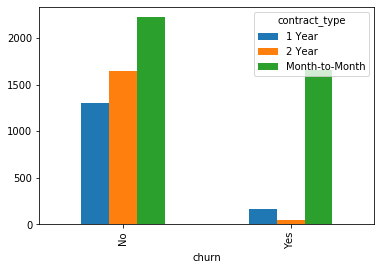

In [42]:
churn_on_contract_type = pd.crosstab(CustDetails['churn'], 
                                     CustDetails['contract_type'],
                                    ) 
                                   
churn_on_contract_type.plot(kind='bar')

# Month-to-Month contract has the highest overall churn rate. 

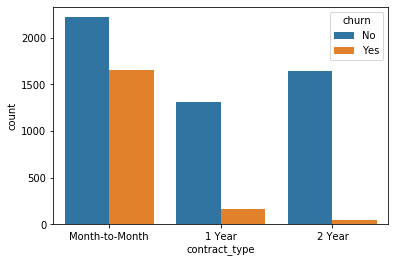

In [31]:
sns.countplot(x='contract_type', 
              hue='churn', 
              data=CustDetails, 
              order=['Month-to-Month', '1 Year', '2 Year'])

In [49]:
pd.crosstab(CustDetails['churn'], CustDetails['contract_type'],normalize=1)

contract_type,1 Year,2 Year,Month-to-Month
churn,,,
No,0.887305,0.971681,0.572903
Yes,0.112695,0.028319,0.427097


In [35]:
boolean = CustDetails.contract_type == 'Month-to-Month'
boolean
CustMonthly = CustDetails[boolean]
CustMonthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3875 entries, 1 to 7046
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         3875 non-null   object 
 1   gender              3875 non-null   object 
 2   is_senior_citizen   3875 non-null   object 
 3   partner             3875 non-null   object 
 4   dependents          3875 non-null   object 
 5   phone_service       3875 non-null   object 
 6   internet_service    3875 non-null   object 
 7   contract_type       3875 non-null   object 
 8   payment_type        3875 non-null   object 
 9   monthly_charges     3875 non-null   float64
 10  total_charges       3875 non-null   float64
 11  churn               3875 non-null   object 
 12  monthly_tenure      3875 non-null   float64
 13  service_type        3875 non-null   object 
 14  partner_dependents  3875 non-null   object 
dtypes: float64(3), object(12)
memory usage: 484.4+ KB


In [36]:
CustMonthly.to_csv('/Users/mms3-pro/Downloads/TelcoMonthly.csv', index=False)

In [50]:
boolean = CustDetails.contract_type == '1 Year'
boolean
CustAnnually = CustDetails[boolean]
CustAnnually.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 0 to 7044
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         1473 non-null   object 
 1   gender              1473 non-null   object 
 2   is_senior_citizen   1473 non-null   object 
 3   partner             1473 non-null   object 
 4   dependents          1473 non-null   object 
 5   phone_service       1473 non-null   object 
 6   internet_service    1473 non-null   object 
 7   contract_type       1473 non-null   object 
 8   payment_type        1473 non-null   object 
 9   monthly_charges     1473 non-null   float64
 10  total_charges       1473 non-null   float64
 11  churn               1473 non-null   object 
 12  monthly_tenure      1473 non-null   float64
 13  service_type        1473 non-null   object 
 14  partner_dependents  1473 non-null   object 
dtypes: float64(3), object(12)
memory usage: 184.1+ KB


In [51]:
boolean = CustDetails.contract_type == '2 Year'
boolean
CustBiennial = CustDetails[boolean]
CustBiennial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 6 to 7048
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         1695 non-null   object 
 1   gender              1695 non-null   object 
 2   is_senior_citizen   1695 non-null   object 
 3   partner             1695 non-null   object 
 4   dependents          1695 non-null   object 
 5   phone_service       1695 non-null   object 
 6   internet_service    1695 non-null   object 
 7   contract_type       1695 non-null   object 
 8   payment_type        1695 non-null   object 
 9   monthly_charges     1695 non-null   float64
 10  total_charges       1695 non-null   float64
 11  churn               1695 non-null   object 
 12  monthly_tenure      1695 non-null   float64
 13  service_type        1695 non-null   object 
 14  partner_dependents  1695 non-null   object 
dtypes: float64(3), object(12)
memory usage: 211.9+ KB


# Exploration
## 2. Go over the 

In [48]:
churn_on_contract_type_relative = pd.crosstab(CustDetails['churn'], 
                                              CustDetails['contract_type'], 
                                              normalize=1
                                             )

churn_on_contract_type_relative

contract_type,1 Year,2 Year,Month-to-Month
churn,,,
No,0.887305,0.971681,0.572903
Yes,0.112695,0.028319,0.427097


In [52]:
monthly_gender = pd.crosstab(CustMonthly['churn'], 
                             CustMonthly['gender'], 
                             normalize=1)
monthly_gender

gender,Female,Male
churn,,
No,0.562597,0.583077
Yes,0.437403,0.416923


In [75]:
total_churn = pd.DataFrame()

In [76]:
total_churn = churn_on_contract_type_relative.merge(monthly_gender, on='churn')
total_churn

,1 Year,2 Year,Month-to-Month,Female,Male
churn,,,,,
No,0.887305,0.971681,0.572903,0.562597,0.583077
Yes,0.112695,0.028319,0.427097,0.437403,0.416923


In [77]:
monthly_senior = pd.crosstab(CustMonthly['churn'], 
                             CustMonthly['is_senior_citizen'], 
                             normalize=1)
monthly_senior

is_senior_citizen,No,Yes
churn,,
No,0.604302,0.453532
Yes,0.395698,0.546468


In [78]:
total_churn = total_churn.merge(monthly_senior, on='churn')
total_churn

,1 Year,2 Year,Month-to-Month,Female,Male,No,Yes
churn,,,,,,,
No,0.887305,0.971681,0.572903,0.562597,0.583077,0.604302,0.453532
Yes,0.112695,0.028319,0.427097,0.437403,0.416923,0.395698,0.546468


In [79]:
monthly_pd_relative = pd.crosstab(CustMonthly['churn'], 
                                  CustMonthly['partner_dependents'], 
                                  normalize=1)
monthly_pd_relative

partner_dependents,dependent only,having both,having none,partnter only
churn,,,,
No,0.671498,0.671821,0.542395,0.562657
Yes,0.328502,0.328179,0.457605,0.437343


In [80]:
total_churn = total_churn.merge(monthly_pd_relative, on='churn')
total_churn

,1 Year,2 Year,Month-to-Month,Female,Male,No,Yes,dependent only,having both,having none,partnter only
churn,,,,,,,,,,,
No,0.887305,0.971681,0.572903,0.562597,0.583077,0.604302,0.453532,0.671498,0.671821,0.542395,0.562657
Yes,0.112695,0.028319,0.427097,0.437403,0.416923,0.395698,0.546468,0.328502,0.328179,0.457605,0.437343


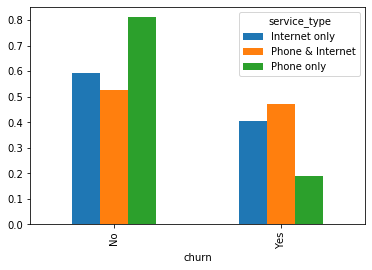

In [92]:
monthly_service_type = pd.crosstab(CustMonthly['churn'], 
                                   CustMonthly['service_type'], 
                                   normalize=1)
monthly_service_type.plot(kind='bar')

In [81]:
total_churn = total_churn.merge(monthly_service_type, on='churn')
total_churn

,1 Year,2 Year,Month-to-Month,Female,Male,No,Yes,dependent only,having both,having none,partnter only,Internet only,Phone & Internet,Phone only
churn,,,,,,,,,,,,,,
No,0.887305,0.971681,0.572903,0.562597,0.583077,0.604302,0.453532,0.671498,0.671821,0.542395,0.562657,0.593085,0.528403,0.811069
Yes,0.112695,0.028319,0.427097,0.437403,0.416923,0.395698,0.546468,0.328502,0.328179,0.457605,0.437343,0.406915,0.471597,0.188931


In [85]:
total_churn.to_csv('/Users/mms3-pro/Downloads/ChurnAnalysis.csv')

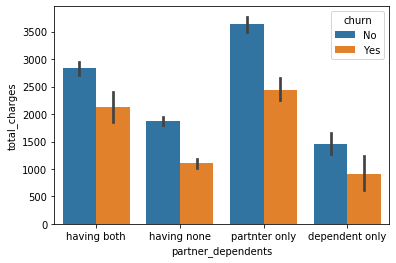

In [91]:
sns.barplot(x = 'partner_dependents', y='total_charges', hue = 'churn', data=CustDetails)

In [90]:
CustDetails.groupby(['partner_dependents','contract_type']).churn.describe()

count unique top  freq
partner_dependents contract_type                        
dependent only     1 Year            85      2  No    78
                   2 Year            69      2  No    67
                   Month-to-Month   207      2  No   139
having both        1 Year           446      2  No   404
                   2 Year           721      2  No   705
                   Month-to-Month   582      2  No   391
having none        1 Year           558      2  No   497
                   2 Year           434      2  No   419
                   Month-to-Month  2288      2  No  1241
partnter only      1 Year           384      2  No   328
                   2 Year           471      2  No   456
                   Month-to-Month   798      2  No   449